In [54]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score





In [ ]:
# Instantiate data 
df = pd.read_csv('diabetes.csv')

In [4]:
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


In [ ]:
# Using standardscaler



In [7]:
X, y = df[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values, df['Diabetic'] 

In [11]:
len(y)

10000

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
y_test

6252    0
4684    1
1731    0
4742    1
4521    1
       ..
6412    1
8285    0
7853    0
1095    0
6929    1
Name: Diabetic, Length: 2000, dtype: int64

In [44]:
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7956666666666666

In [51]:
y_scores = model.predict_proba(X_test)

In [55]:
auc = roc_auc_score(y_test, y_scores[:,1])

In [56]:
auc

0.8576567152537863

Text(0.5, 1.0, 'ROC Curve')

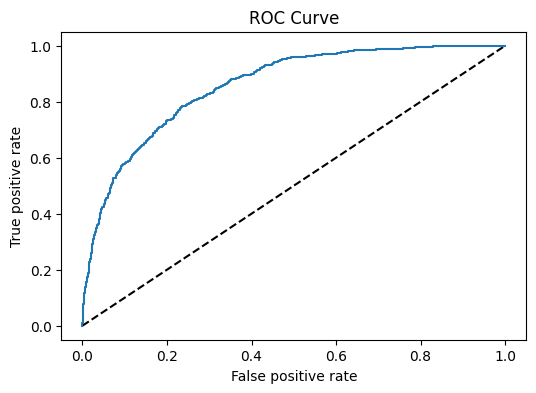

In [52]:
# plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 4))

# Plot diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')

#plot the FPR and TPR achieved by trained model
 
plt.plot(fpr, tpr) 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')